In [1]:
import sys
sys.path.insert(0, '..')
import time
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib notebook  
import numpy as np

from Configuration import Configuration
from MotorUnitPool import MotorUnitPool
from AfferentPool import AfferentPool
from SynapsesFactory import SynapsesFactory

In [2]:
conf = Configuration('confmuscleStimulation.rmto')

In [3]:
t = np.arange(0.0, conf.simDuration_ms, conf.timeStep_ms)



pools = dict()
pools[0] = MotorUnitPool(conf, 'SOL')
#pools[1] = AfferentPool(conf,'Ia', 'SOL')
#pools[2]= AfferentPool(conf,'Ia', 'LG')
Syn = SynapsesFactory(conf, pools)
del Syn 

Motor Unit Pool SOL built
Afferent Pool Ia of muscle SOL built
Afferent Pool Ia of muscle LG built
All the 7697 synapses were built


<IPython.core.display.Javascript object>


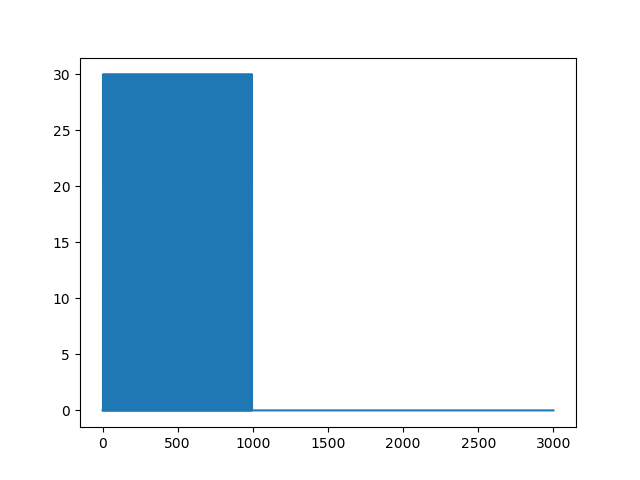

In [4]:
plt.plot(t, pools[0].unit[0].nerveStimulus_mA)

In [5]:
tic = time.clock()
for i in xrange(0, len(t)-1):
    pools[0].atualizeMotorUnitPool(t[i])
    #pools[1].atualizeAfferentPool(t[i])
    #pools[2].atualizeAfferentPool(t[i])
toc = time.clock()
print str(toc - tic) + ' seconds'

278.080675 seconds


<IPython.core.display.Javascript object>


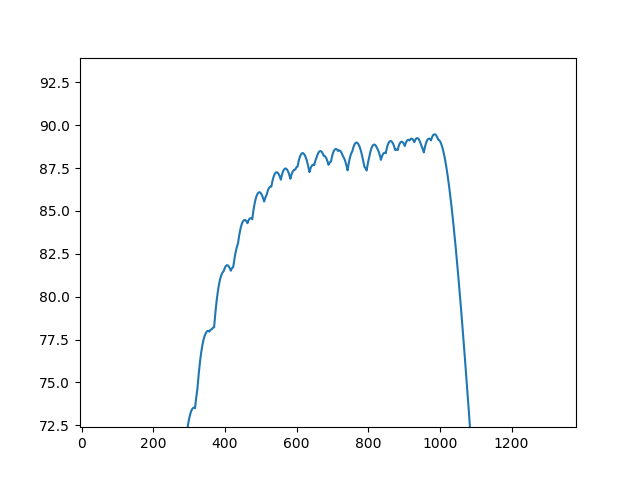

In [6]:
plt.figure()
plt.plot(t, pools[0].Muscle.force)

<IPython.core.display.Javascript object>


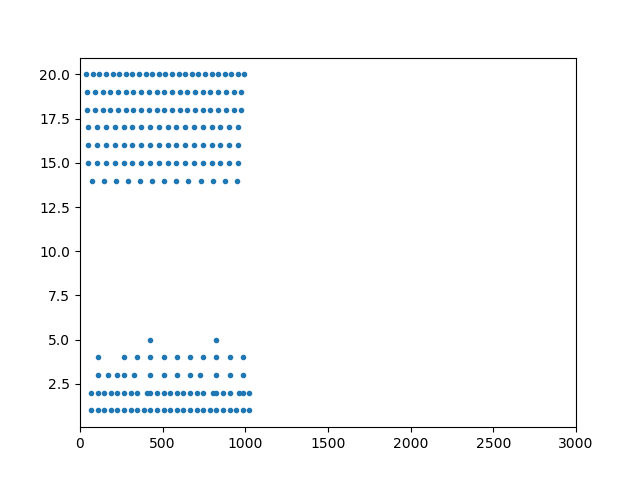

(0, 3000)

In [7]:
pools[0].listSpikes()
plt.figure()
plt.plot(pools[0].poolTerminalSpikes[:, 0],
         pools[0].poolTerminalSpikes[:, 1]+1, '.')
plt.xlim([0,3000])